In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#from google.colab import drive
from os import listdir
from random import Random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler

#folder_path = '/content/drive/MyDrive/ML_Project'
#datasets_path = '/content/drive/MyDrive/ML_Project/datasets'

#drive.mount("/content/drive")

df_train = pd.read_csv(f'datasets/trainV2_cleaned.csv')
df_train = df_train.drop(['outcome_profit'], 1)
df_train = df_train[df_train["outcome_damage_inc"] == 1]
df_train = df_train.drop(['outcome_damage_inc'], 1)

#df_to_predict = pd.read_csv(f'{datasets_path}/score.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 1 to 4983
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income_am                      1277 non-null   float64
 1   profit_last_am                 1277 non-null   float64
 2   profit_am                      1277 non-null   float64
 3   damage_am                      1277 non-null   float64
 4   damage_inc                     1277 non-null   int64  
 5   crd_lim_rec                    1277 non-null   float64
 6   cab_requests                   1277 non-null   int64  
 7   bar_no                         1277 non-null   int64  
 8   neighbor_income                1277 non-null   float64
 9   age                            1277 non-null   int64  
 10  client_segment                 1277 non-null   float64
 11  sect_empl                      1277 non-null   int64  
 12  fam_adult_size                 1277 non-null   i

C:\Users\robbe\AppData\Local\Temp/ipykernel_3464/867087401.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(['outcome_profit'], 1)
C:\Users\robbe\AppData\Local\Temp/ipykernel_3464/867087401.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(['outcome_damage_inc'], 1)


In [3]:
df_shuffle = df_train.sample(frac=1, random_state=123)
#outcomes = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']

x = df_shuffle.drop('outcome_damage_amount',1)
y = df_shuffle["outcome_damage_amount"]

x_trainval, x_test, y_trainval, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(x_trainval,y_trainval, test_size=0.2, random_state=1234)

num_feat = x_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
x_train_stand = x_train.copy()
x_trainval_stand = x_trainval.copy()
x_val_stand = x_val.copy()

x_test_stand = x_test.copy()
x_train_stand[num_feat] = scaler.fit_transform(x_train_stand[num_feat])
x_val_stand[num_feat] = scaler.transform(x_val_stand[num_feat])
x_trainval_stand[num_feat] = scaler.transform(x_trainval_stand[num_feat])
x_test_stand[num_feat] = scaler.transform(x_test_stand[num_feat])

df_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 818 to 4346
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income_am                      1277 non-null   float64
 1   profit_last_am                 1277 non-null   float64
 2   profit_am                      1277 non-null   float64
 3   damage_am                      1277 non-null   float64
 4   damage_inc                     1277 non-null   int64  
 5   crd_lim_rec                    1277 non-null   float64
 6   cab_requests                   1277 non-null   int64  
 7   bar_no                         1277 non-null   int64  
 8   neighbor_income                1277 non-null   float64
 9   age                            1277 non-null   int64  
 10  client_segment                 1277 non-null   float64
 11  sect_empl                      1277 non-null   int64  
 12  fam_adult_size                 1277 non-null  

C:\Users\robbe\AppData\Local\Temp/ipykernel_3464/566983413.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_shuffle.drop('outcome_damage_amount',1)


In [4]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [5]:
predictions_train = reg.predict(x_train)
predictions_val = reg.predict(x_val)

In [6]:
print(r2_score(y_train, predictions_train))
print(r2_score(y_val, predictions_val))

0.2237134934090077
0.06736168983501767


In [7]:
print(mean_absolute_error(y_val, predictions_val))
print(mean_absolute_error(y_train, predictions_train))

0.0761017467910045
0.06653379461422135


In [8]:
print(mean_squared_error(y_val, predictions_val))
print(mean_squared_error(y_train, predictions_train))

0.00944245647649814
0.008663382916045698


In [9]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_train_poly.shape

(816, 2278)

In [10]:
# Define the model
reg_quad = LinearRegression(fit_intercept=False)

#Fit the model
reg_quad.fit(x_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [11]:
print(reg_quad.score(x_train_poly, y_train))
print(reg_quad.score(x_val_poly, y_val))

0.7668556760710701
-206.3561354253045


In [ ]:
#avg_scores = [None] * 5

#for i in np.arange(1,6):
    
#    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
#                        ('linear', LinearRegression(fit_intercept=False))])
    
#    scores = cross_val_score(reg_poly, x_train_stand, y_train,  scoring="r2", cv=5)
    
#    avg_scores[i-1] = scores.mean()
    
#    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 6))
#plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
#plt.axis('tight')
#plt.title("Cross-validation polynomials")
#ax.set_xlabel("Order")
#ax.set_ylabel("CV R^2")
#plt.tight_layout()
#plt.show()

#RNN

In [12]:
Radius = np.linspace(1, 16, 15)
cv_scores = []
sd_scores = []

for j in Radius:
  rnn = RadiusNeighborsRegressor(radius=j)
  scores = cross_val_score(rnn, x_train, y_train, cv=5)
  cv_scores.append(scores.mean())
  sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in 

#KNN

In [13]:
k = np.arange(1, 500)
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for n in k:
    knn = KNeighborsRegressor(n_neighbors= n)
    scores = cross_val_score(knn, x_train, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

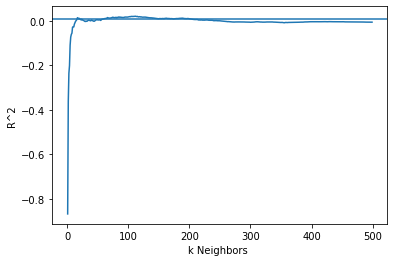

The best k is 112


In [14]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(k, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best k is', k[max_index])

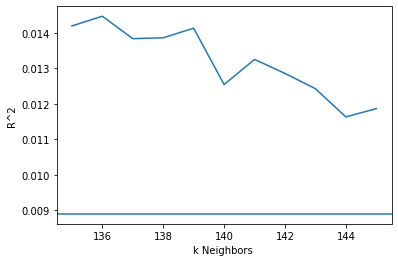

The best k is 112


In [15]:
plt.plot(k[134 : 145],cv_scores[134 : 145])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.axhline(y=max_value-1.96*sd_scores[max_index])


plt.show()
print('The best k is', k[max_index])

In [16]:
knn = KNeighborsRegressor(n_neighbors=140)
knn.fit(x_train, y_train)  
print('train value:',knn.score(x_train, y_train) )
print('validation value:',knn.score(x_val, y_val) )

train value: 0.047634293749382994
validation value: -0.013580474096339668


In [17]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)
X_val_poly = poly.transform(x_val)
X_train_poly.shape

(816, 52394)

In [18]:
linreg_lassoCV = LassoCV(cv=5, max_iter=500, n_jobs=-1, verbose=1).fit(X_train_poly, y_train)
print('R2 Training : %.3f' % linreg_lassoCV.score(X_train_poly, y_train))
print('R2 Testing : %.3f' % linreg_lassoCV.score(X_val_poly, y_val))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


R2 Training : 0.082
R2 Testing : 0.043


In [19]:
criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 150)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, 
                               cv = 5, verbose=5, random_state=6541, n_jobs=-1)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_sampl

In [20]:
print(rf_random.score(x_train, y_train))
print(rf_random.score(x_val, y_val))

0.43522467303150303
0.12380049559502593


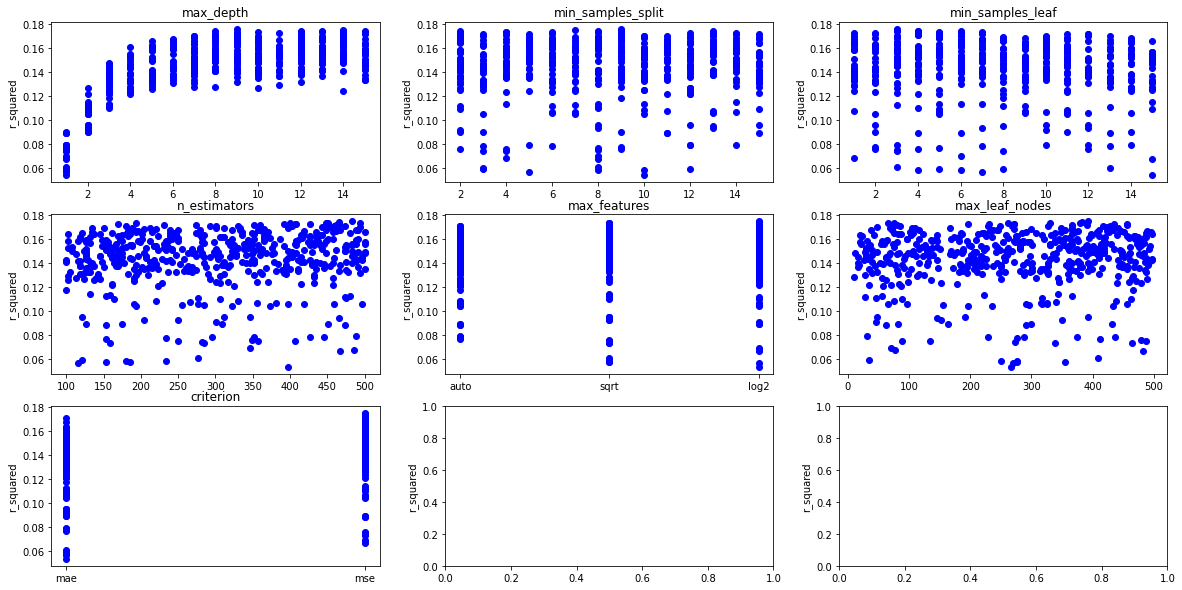

In [21]:
out = pd.DataFrame(rf_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

In [22]:
out = out[out.mean_test_score > 0.18]

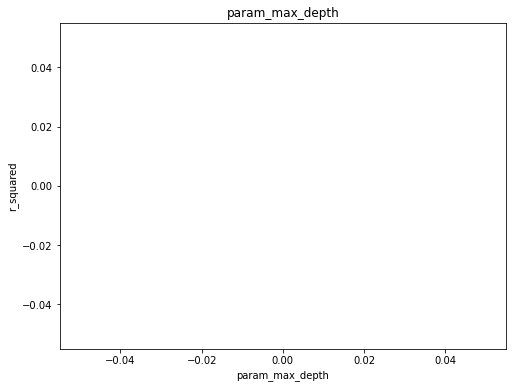

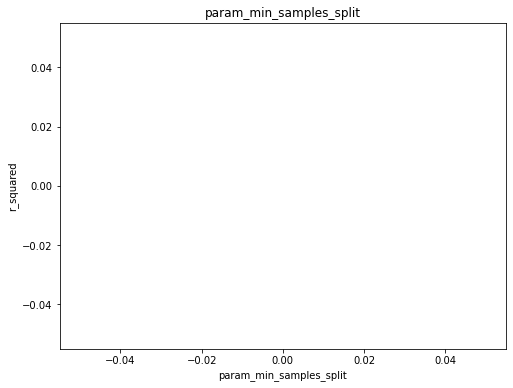

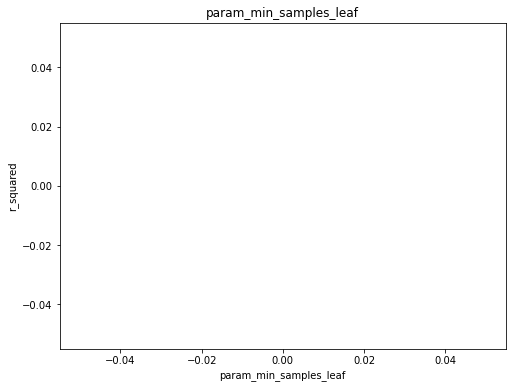

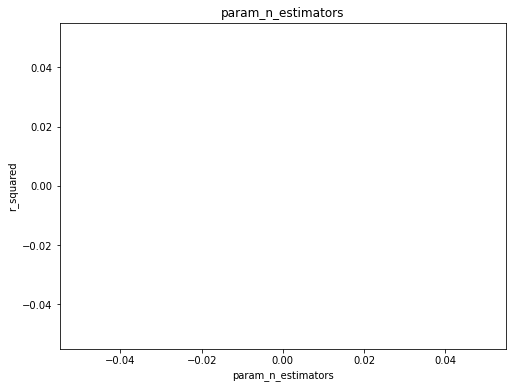

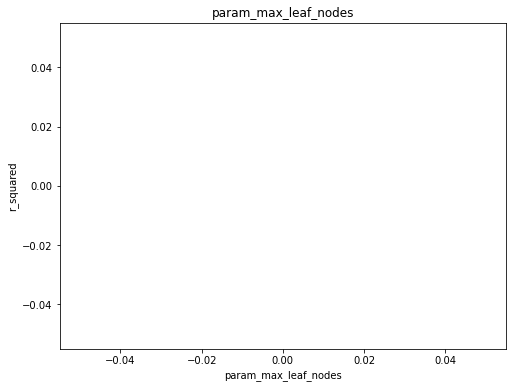

In [23]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out[xlabel]
    ys = out['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)

    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [24]:
rf_random.best_params_

{'n_estimators': 483,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 392,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'mse'}

In [25]:
max_depth = [9, 12, 13, 14]
min_samples_split = [7, 8, 9, 13]
min_samples_leaf = [3, 4, 5]
n_estimators = [357, 392, 400, 465]
max_features = ['auto']
max_leaf_nodes = [272, 366, 383]
criterion =['mse']


# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
                'max_leaf_nodes': max_leaf_nodes,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                               cv = 5, verbose=1,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [9, 12, 13, 14],
                         'max_features': ['auto'],
                         'max_leaf_nodes': [272, 366, 383],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 8, 9, 13],
                         'n_estimators': [357, 392, 400, 465]},
             verbose=1)

In [26]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': 366,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 465}

In [27]:
params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(x_train, y_train)
print('R2: %.3f' % rf_gridBest.score(x_train, y_train))
print('R2: %.3f' % rf_gridBest.score(x_val, y_val))

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2: 0.604
R2: 0.057


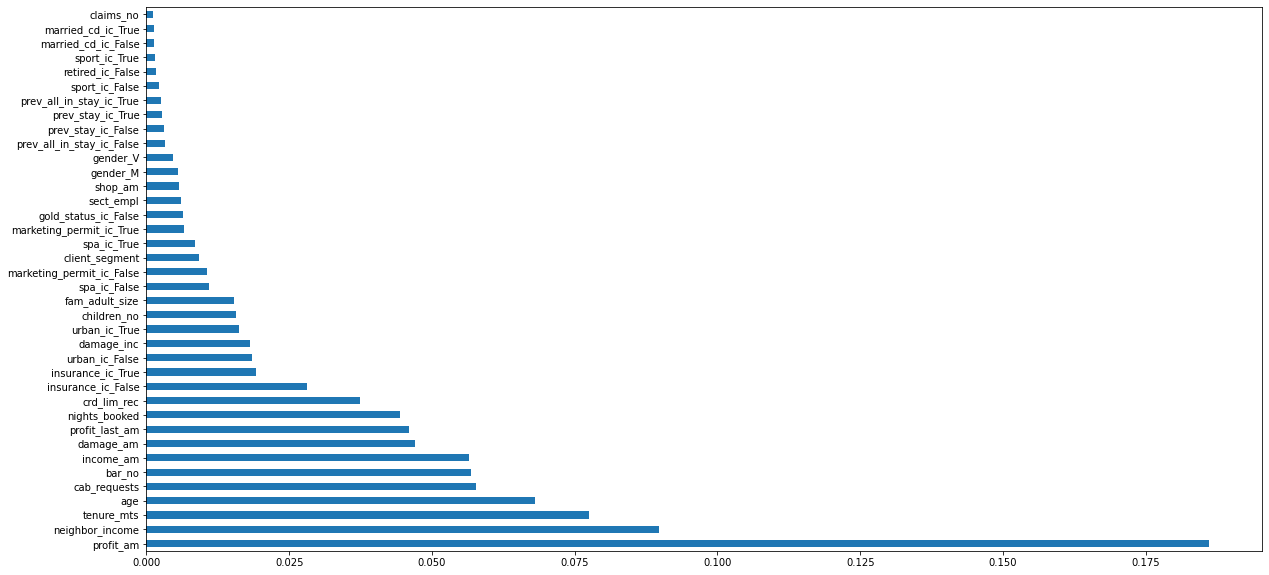

In [28]:
plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=x_train.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.show()

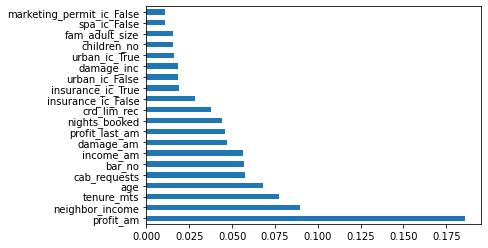

In [29]:
plt.figure()

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [30]:
max_features = ['auto']
criterion =['mse']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 300)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 1000, 
                               cv = 5, verbose=2, random_state=1234, n_jobs=-1)
gbm_random.fit(x_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squ

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, 1...
                   

In [31]:
print(gbm_random.score(x_train, y_train))
gbm_random.score(x_val, y_val)

0.3156264776854205


0.12928134131009839

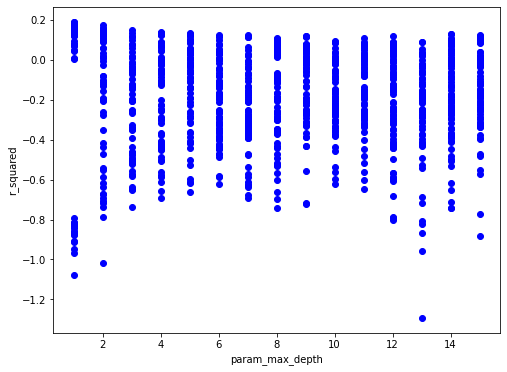

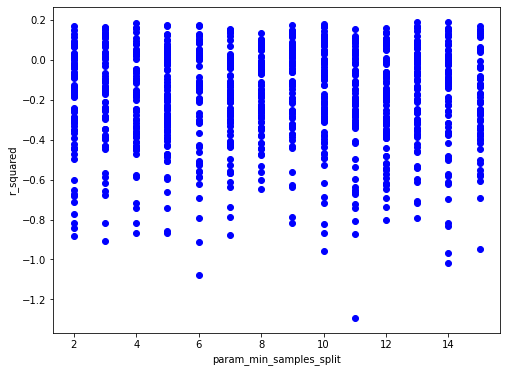

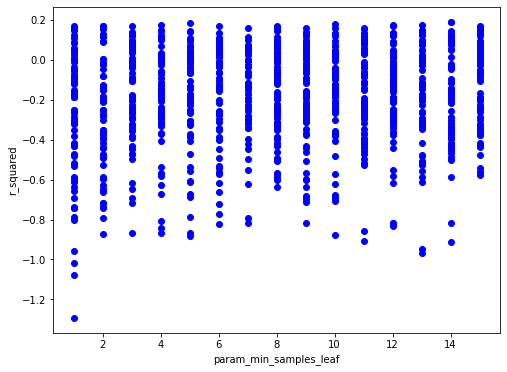

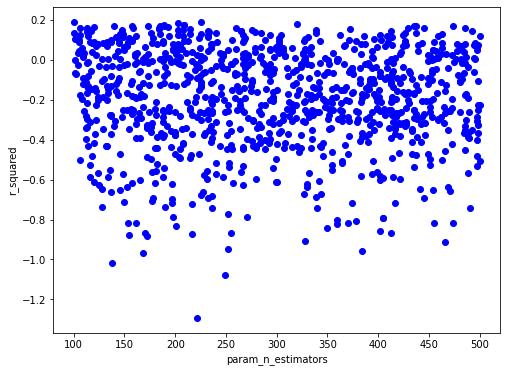

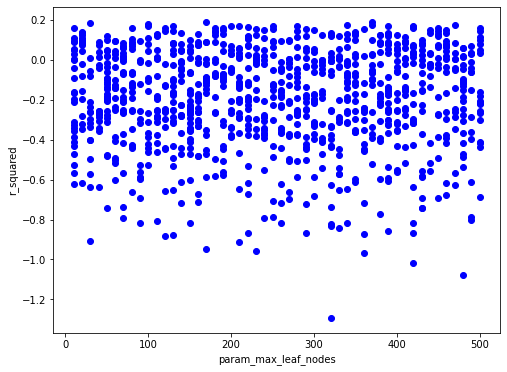

In [32]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");

In [33]:
out2 = out2[out2.mean_test_score > 0.18]

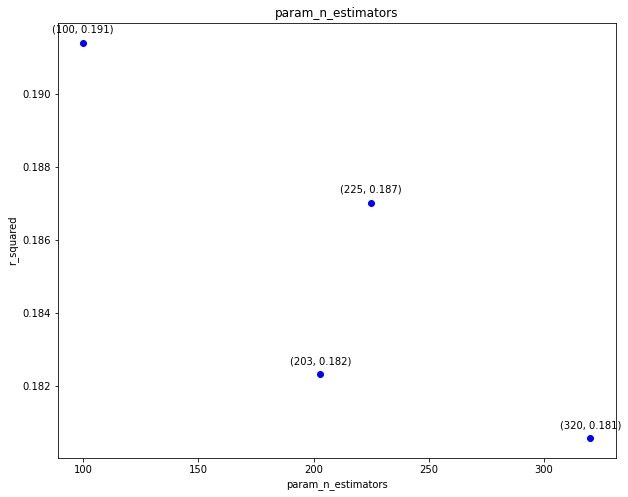

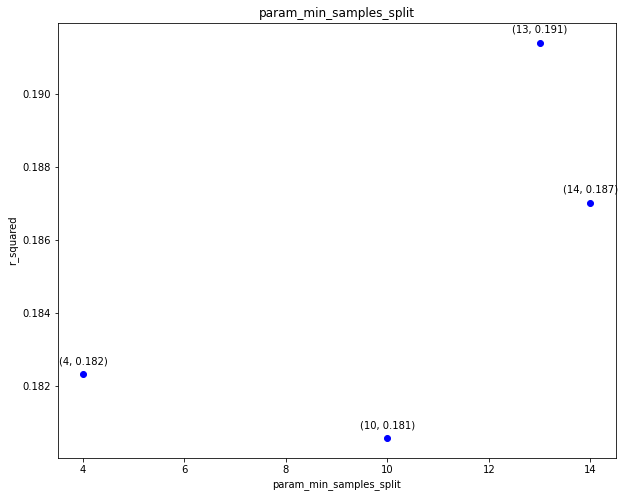

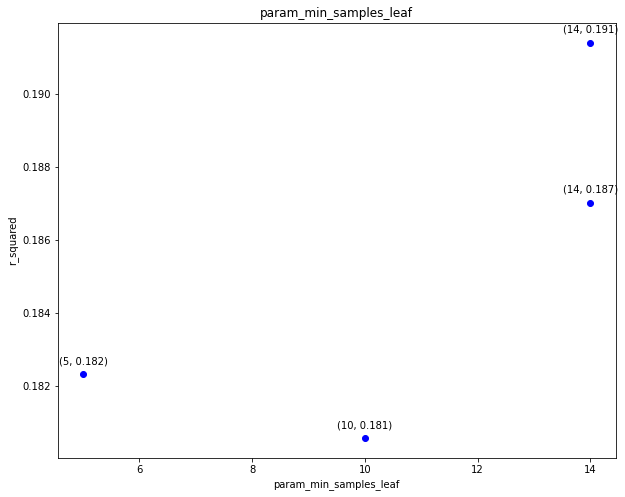

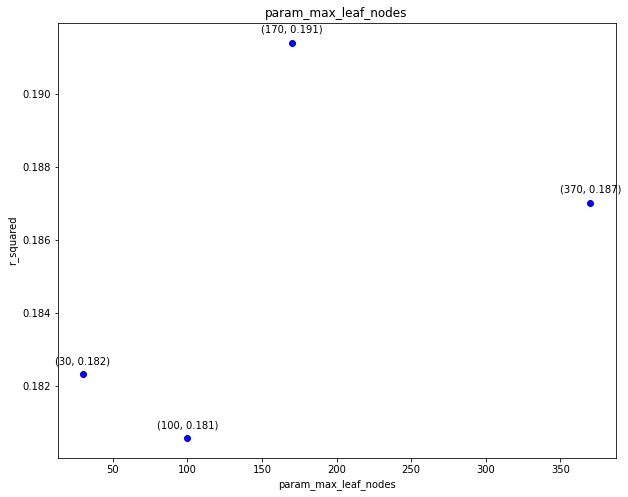

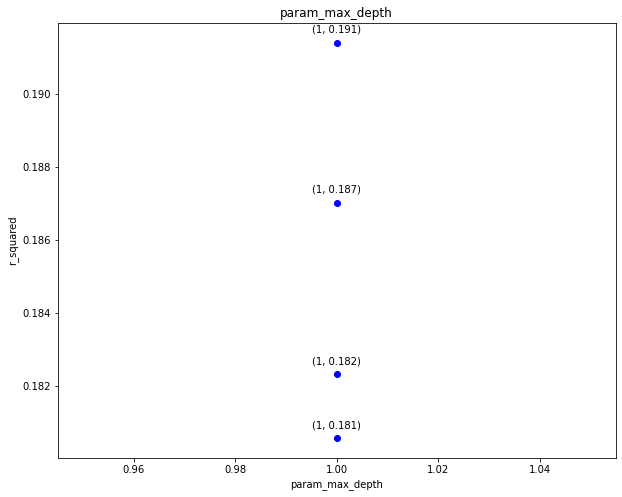

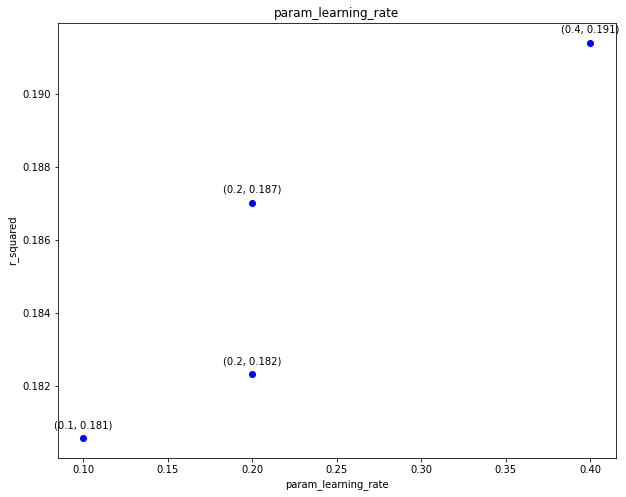

In [34]:
xlabel_names = ['param_n_estimators', 'param_min_samples_split','param_min_samples_leaf','param_max_leaf_nodes','param_max_depth', 'param_learning_rate']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(10, 8))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)

    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [35]:
gbm_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 13,
 'min_samples_leaf': 14,
 'max_leaf_nodes': 170,
 'max_features': 'auto',
 'max_depth': 1,
 'loss': 'huber',
 'learning_rate': 0.4,
 'criterion': 'mse'}

In [36]:
n_estimators = [100, 106, 225, 320]
min_samples_split = [10, 13, 14]
min_samples_leaf = [8, 10, 14]
max_leaf_nodes = [10, 170, 180, 370]
max_features = ['auto']
max_depth = [1, 2]
loss = ['ls']

learning_rate = [0.1, 0.2, 0.39, 0.4]
criterion =['squared_error']


# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 10, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(x_train, y_train)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.1, 0.2, 0.39, 0.4], 'loss': ['ls'],
                         'max_depth': [1, 2], 'max_features': ['auto'],
                         'max_leaf_nodes': [10, 170, 180, 370],
                         'min_samples_leaf': [8, 10, 14],
                         'min_samples_split': [10, 13, 14],
                         'n_estimators': [100, 106, 225, 320]},
             verbose=2)

In [37]:
gbm_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 370,
 'min_samples_leaf': 14,
 'min_samples_split': 14,
 'n_estimators': 320}

In [38]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(x_train, y_train)
print('R2: %.3f' % gbm_gridBest.score(x_train, y_train))
print('R2: %.3f' % gbm_gridBest.score(x_val, y_val))

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R2: 0.317
R2: 0.127


In [39]:
#model = beste model nog veranderen!!
joblib.dump(gbm_gridBest, "models/Damage_amount_best_model.pkl")

['models/Damage_amount_best_model.pkl']